<a href="https://colab.research.google.com/github/nhareesha/MLAI/blob/ML/NN/DigitRecognitionWithTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

**Tensorflow and Keras**

Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This exercise will be using the Keras interface.

# Problem Statement

Load pixel information and classify if a given digit is 0,1,2,3,4,5,6,7,8,9.

For more complex tasks like image recognition where the feature set is in large, it is preferred to use NN to solve the problem. Here NN is solving the classification problem.



```
MNIST digits classification dataset from Kera.

Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the MNIST homepage.

Arguments

path: path where to cache the dataset locally (relative to ~/.keras/datasets).
Returns

Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).
x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.```





In [3]:
# Load digit classification dataset from Keras library
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

# Data Exploration before flattening
print("Sample from x_train:", x_train[0]) # return the 1st sample
print("Sample from y_train:", y_train[0])


# Flatten the 28x28 images while retaining 60000 data points
X_train_flat = x_train.reshape(x_train.shape[0], -1)

# Print the shape of the flattened array
print("Shape of x_train_flat:", X_train_flat.shape)
print("Shape of y_train:", y_train.shape)

# Data Exploration after falttening
print("Sample from x_train:", X_train_flat[0]) # return the 1st sample
print("Sample from y_train:", y_train[0])

11490434/11490434 [==============================] - 0s 0us/step
Sample from x_train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39

View few rows

In [4]:
print(X_train_flat[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

# Normalize Data
Fitting the weights to the data (back-propagation) will proceed more quickly if the data is normalized. This is the same procedure  where features in the data are each normalized to have a similar range.

The procedure below uses a Keras normalization layer. It has the following steps:

- create a "Normalization Layer". Note, as applied here, this is not a layer in your model.
- 'adapt' the data. This learns the mean and variance of the data set and saves the values internally.
- normalize the data.

It is important to apply normalization to any future data that utilizes the learned model.

In [5]:
# Before normalization
print(f"Min Max values of each feature - {np.max(X_train_flat[:,0]):.2f},{np.median(X_train_flat[:,0]):.2f}")
normalization_layer = tf.keras.layers.Normalization(axis=-1) # normalizes along the last(or right most) dimension which is columns
normalization_layer.adapt(X_train_flat)  # learns mean, variance
Xn_train = normalization_layer(X_train_flat)
print(f"Sample data from X_train : {Xn_train[0]}") # Prints 1st instance



Min Max values of each feature - 0.00,0.00
Sample data from X_train : [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.41810582e-03 -5.75485127e-03 -4.08253865e-03 -4.08254098e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.08252655e-03 -4.70970897e-03 -8.79932940e-03 -1.15905553e-02
 -1.47589752e-02 -1.92848425e-02 -2.46718246e-02 -2.90710572e-02
 -3.05926725e-02 -3.11640147e-02 -3.19629647e-02 -3.02025899e-02
 -3.13101709e-02 -2.83834040e-02 -2.31191888e-02 -1.91666111e-02
 -1.67722348e-02 -1.09963380e-02 -8.32486618e-03 -4.38072998e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.

We have enough data. We don't probably need synthetic data at this point. So lets build a multi class classification.

Multiclass classification is a type of logistic regression where the target variable can be one of finet set of classes.

1. Input Xn_train has shape (60000, 784). So 784 features.
2. Layer 1 - with 50 units and ReLu activation
3. Layer 2 - with 30 units and Relu activation
4. Layer 3 - with 20 units with Relu activation
5. Layer 4 output layer -  with 10 units - Softmax activation.

###Softmax regression is algorithm used for multi class classification.

The `tf.keras.Input(shape=(2,)),` specifies the expected shape of the input. This allows Tensorflow to size the weights and bias parameters at this point. This is useful when exploring Tensorflow models. This statement can be omitted in practice and Tensorflow will size the network parameters when the input data is specified in the model.fit statement.

In [6]:
tf.random.set_seed(1234)  # applied to achieve consistent results

# After flattening input dataset X_train  has shape (60000, 784)
model = Sequential(
    [
     tf.keras.Input(shape=(784,)),
     Dense(50, activation='relu', name = 'layer1'),
     Dense(30, activation='relu', name = 'layer2'),
     Dense(20, activation='relu', name = 'layer3'),
     Dense(10, activation='softmax', name = 'outputLayer')]
)


`model.summary()` gives description of network

In [7]:
model.summary()

#Trainable parameters
layer1_parameters = 784 * 50 + 50
layer2_parameters = 50 * 30 + 30
layer3_parameters = 30 * 20 + 20
output_parameters = 20 * 10 + 10

print(f"layer1_parameter count - {layer1_parameters}")
print(f"layer2_parameter count - {layer2_parameters}")
print(f"layer3_parameter count - {layer3_parameters}")
print(f"output_parameter count - {output_parameters}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 50)                39250     
                                                                 
 layer2 (Dense)              (None, 30)                1530      
                                                                 
 layer3 (Dense)              (None, 20)                620       
                                                                 
 outputLayer (Dense)         (None, 10)                210       
                                                                 
Total params: 41610 (162.54 KB)
Trainable params: 41610 (162.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
layer1_parameter count - 39250
layer2_parameter count - 1530
layer3_parameter count - 620
output_parameter count - 210


Weights before fitting or training.

In [8]:
layer1_weights = model.get_layer("layer1").get_weights()
layer2_weights = model.get_layer("layer2").get_weights()
layer3_weights = model.get_layer("layer3").get_weights()
layer4_weights = model.get_layer("outputLayer").get_weights()
print(len(layer1_weights)) # 2 arrays , one for W and another one for B

W1, B1 = layer1_weights
W2, B2 = layer2_weights
W3, B3 = layer3_weights
W4, B4 = layer4_weights
print(f"W1{W1.shape}:\n", W1, f"\nb1{B1.shape}:", B1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{B2.shape}:", B2)
print(f"W3{W3.shape}:\n", W3, f"\nb1{B3.shape}:", B3)
print(f"W4{W4.shape}:\n", W4, f"\nb2{B4.shape}:", B4)

2
W1(784, 50):
 [[ 0.01181401 -0.01900268  0.06294244 ...  0.08422223 -0.04990296
  -0.08205245]
 [ 0.07816235  0.050683   -0.0822475  ... -0.03071176  0.0617181
   0.03608532]
 [-0.05667012 -0.03215186  0.07760724 ...  0.04248787 -0.0811858
   0.01598947]
 ...
 [-0.0368514   0.0443342   0.07262727 ...  0.01683784  0.05088256
   0.03414516]
 [-0.02898586  0.02580316 -0.00150158 ... -0.04516606  0.06458994
   0.07116368]
 [ 0.01872347  0.03722747  0.06670666 ...  0.06241339 -0.03875665
   0.04215956]] 
b1(50,): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
W2(50, 30):
 [[ 0.26016182 -0.18340932  0.19097176 ...  0.02680492  0.0833703
  -0.08995228]
 [ 0.05376869  0.01278639 -0.09257023 ...  0.16356757  0.16318235
   0.19260803]
 [-0.13149501 -0.0823551   0.07449278 ... -0.11604647 -0.18709958
  -0.15982357]
 ...
 [-0.20154887 -0.08949901  0.14915517 ... -0.13641411 -0.24062572
  -0

- The `model.compile` statement defines a loss function and specifies a compile optimization.
- The `model.fit` statement runs gradient descent and fits the weights to the data.

In [9]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    )

model.fit(
    Xn_train,y_train,
    epochs=10,
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3625
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2261
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2037
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2104
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1946
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1877
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1804
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1754
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1767


Updated weights after training.

In [10]:
layer1_weights = model.get_layer("layer1").get_weights()
layer2_weights = model.get_layer("layer2").get_weights()
layer3_weights = model.get_layer("layer3").get_weights()
layer4_weights = model.get_layer("outputLayer").get_weights()
print(len(layer1_weights)) # 2 arrays , one for W and another one for B

W1, B1 = layer1_weights
W2, B2 = layer2_weights
W3, B3 = layer3_weights
W4, B4 = layer4_weights
print(f"W1{W1.shape}:\n", W1, f"\nb1{B1.shape}:", B1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{B2.shape}:", B2)
print(f"W3{W3.shape}:\n", W3, f"\nb1{B3.shape}:", B3)
print(f"W4{W4.shape}:\n", W4, f"\nb2{B4.shape}:", B4)

2
W1(784, 50):
 [[ 0.01181401 -0.01900268  0.06294244 ...  0.08422223 -0.04990296
  -0.08205245]
 [ 0.07816235  0.050683   -0.0822475  ... -0.03071176  0.0617181
   0.03608532]
 [-0.05667012 -0.03215186  0.07760724 ...  0.04248787 -0.0811858
   0.01598947]
 ...
 [-0.0368514   0.0443342   0.07262727 ...  0.01683784  0.05088256
   0.03414516]
 [-0.02898586  0.02580316 -0.00150158 ... -0.04516606  0.06458994
   0.07116368]
 [ 0.01872347  0.03722747  0.06670666 ...  0.06241339 -0.03875665
   0.04215956]] 
b1(50,): [-3.9935431  -1.3625085  -2.9584217  -3.8355906  -3.6881752  -3.6832776
 -2.444233   -5.708509   -3.886665   -2.0125058  -5.449488   -5.798985
 -6.669967   -4.1563644  -5.9540153  -7.5388103  -5.1733937  -5.564305
 -2.0434024  -4.2719703  -6.159387   -3.7696984  -3.7126474  -2.1937668
 -0.89049304 -0.18478443 -5.860623   -3.5867643  -1.4118838  -3.427294
 -6.1240296  -2.1968265  -5.6166115  -7.163376   -5.5242577  -5.1209493
 -5.1800103  -3.571988   -3.8119345  -4.792303   -2.796

Before doing predictions, it is crusial to preprocess data same as that of training set.

- Flatten to change 3-D to 2-D
- Normalize using learned mean and variance from X_train.


The values output by Sigmoid activation are probabalities over the classes (digits in this case) rather than discrete digit labels.

To get the predicted digit labels, you should convert the softmax probabilities into actual digit labels.

`np.argmax(predicted_probabilities, axis=-1)` is used to find the class (digit) with the highest probability for each sample, effectively giving you the predicted digit labels.


In [17]:
# Flatten the 28x28 images while retaining all data points
X_test_flat = x_test.reshape(x_test.shape[0], -1)

#Normalize
Xn_test = normalization_layer(X_test_flat)

# Predict
y_test_predicted = model.predict(Xn_test) # this should give estimated model predections

print(f"y_test_predicted : {y_test_predicted.shape}" , y_test_predicted[:1])
print(f"y_train : {y_train.shape}" , y_train[:1])

# Convert probabilities to digit labels
predicted_labels = np.argmax(y_test_predicted, axis=-1)

print(f"y_test : {y_test.shape}" , y_test[:1])
print(f"y_test_predicted : {y_test_predicted.shape}" , predicted_labels[:1])


313/313 [==============================] - 0s 2ms/step
y_test_predicted : (10000, 10) [[1.8332832e-32 2.4574508e-14 2.3283221e-19 1.8960989e-12 1.2234799e-13
  1.0205160e-17 1.2905028e-29 9.9999994e-01 6.7586781e-23 1.0738353e-13]]
y_train : (60000,) [5]
y_test : (10000,) [7]
y_test_predicted : (10000, 10) [7]


Evaluate Model

`np.mean(y_test_predicted == y_test)`

In [18]:
# Accuracy
accuracy = np.mean(predicted_labels == y_test)
print(f"Accuracy of the model - {accuracy}")

Accuracy of the model - 0.9519


Plot `y_test vs y_test_predicted_labels`

This scatter plot will help you visualize how well your model's predictions align with the actual class labels. Points along the diagonal line represent correct predictions, while points off the diagonal represent misclassifications.


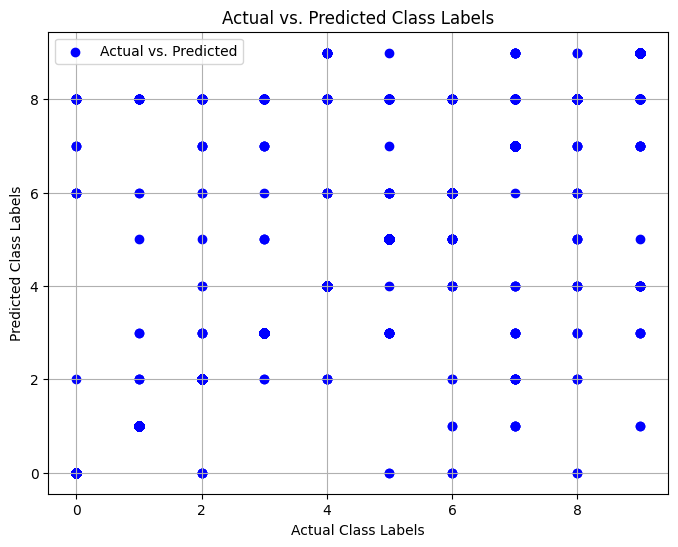

In [19]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_labels, c='blue', marker='o', label='Actual vs. Predicted')

# Add labels and legend
plt.xlabel('Actual Class Labels')
plt.ylabel('Predicted Class Labels')
plt.title('Actual vs. Predicted Class Labels')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Confusion Matrix is usually alligned as below.

```
[[TN, FP]
 [FN, TP]]
```

How to interpret the Heat map generated ?

When interpreting a heatmap:

- Darker colors (e.g., darker shades of Green) usually represent higher counts, while lighter colors represent lower counts.

- Focus on the diagonal elements. A strong model will have a high count of TP and TN.

- Pay attention to off-diagonal elements, particularly FP and FN. High counts of FP and FN can indicate areas where the model is making errors.

- The sum of all elements in the confusion matrix should equal the total number of samples.

- Overall, a good model will have high values on the diagonal `(TN and TP)` and low values off the diagonal `(FP and FN)`.

Understanding the confusion matrix and heatmap is crucial for evaluating and fine-tuning your classification model.



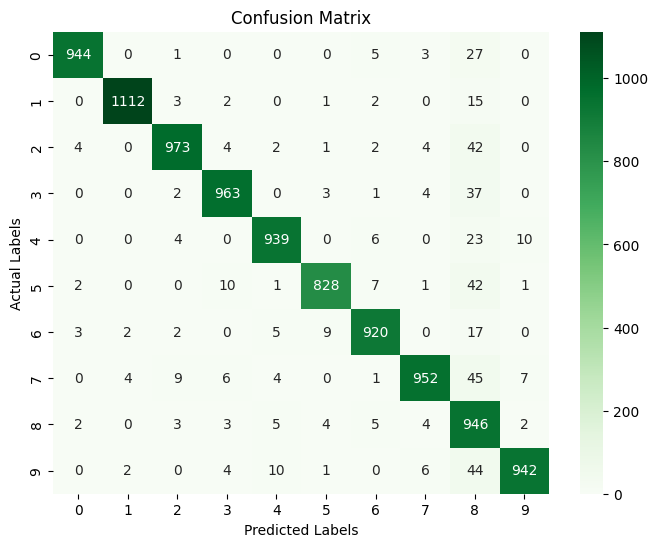

In [23]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predicted_labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['0', '1', '2', '3', '4', '5','6','7','8','9'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()